  buying  maint doors persons lug_boot safety  accep
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
Index(['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high',
       'maint_low', 'maint_med', 'maint_vhigh', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high',
       'safety_low', 'safety_med'],
      dtype='object')
21


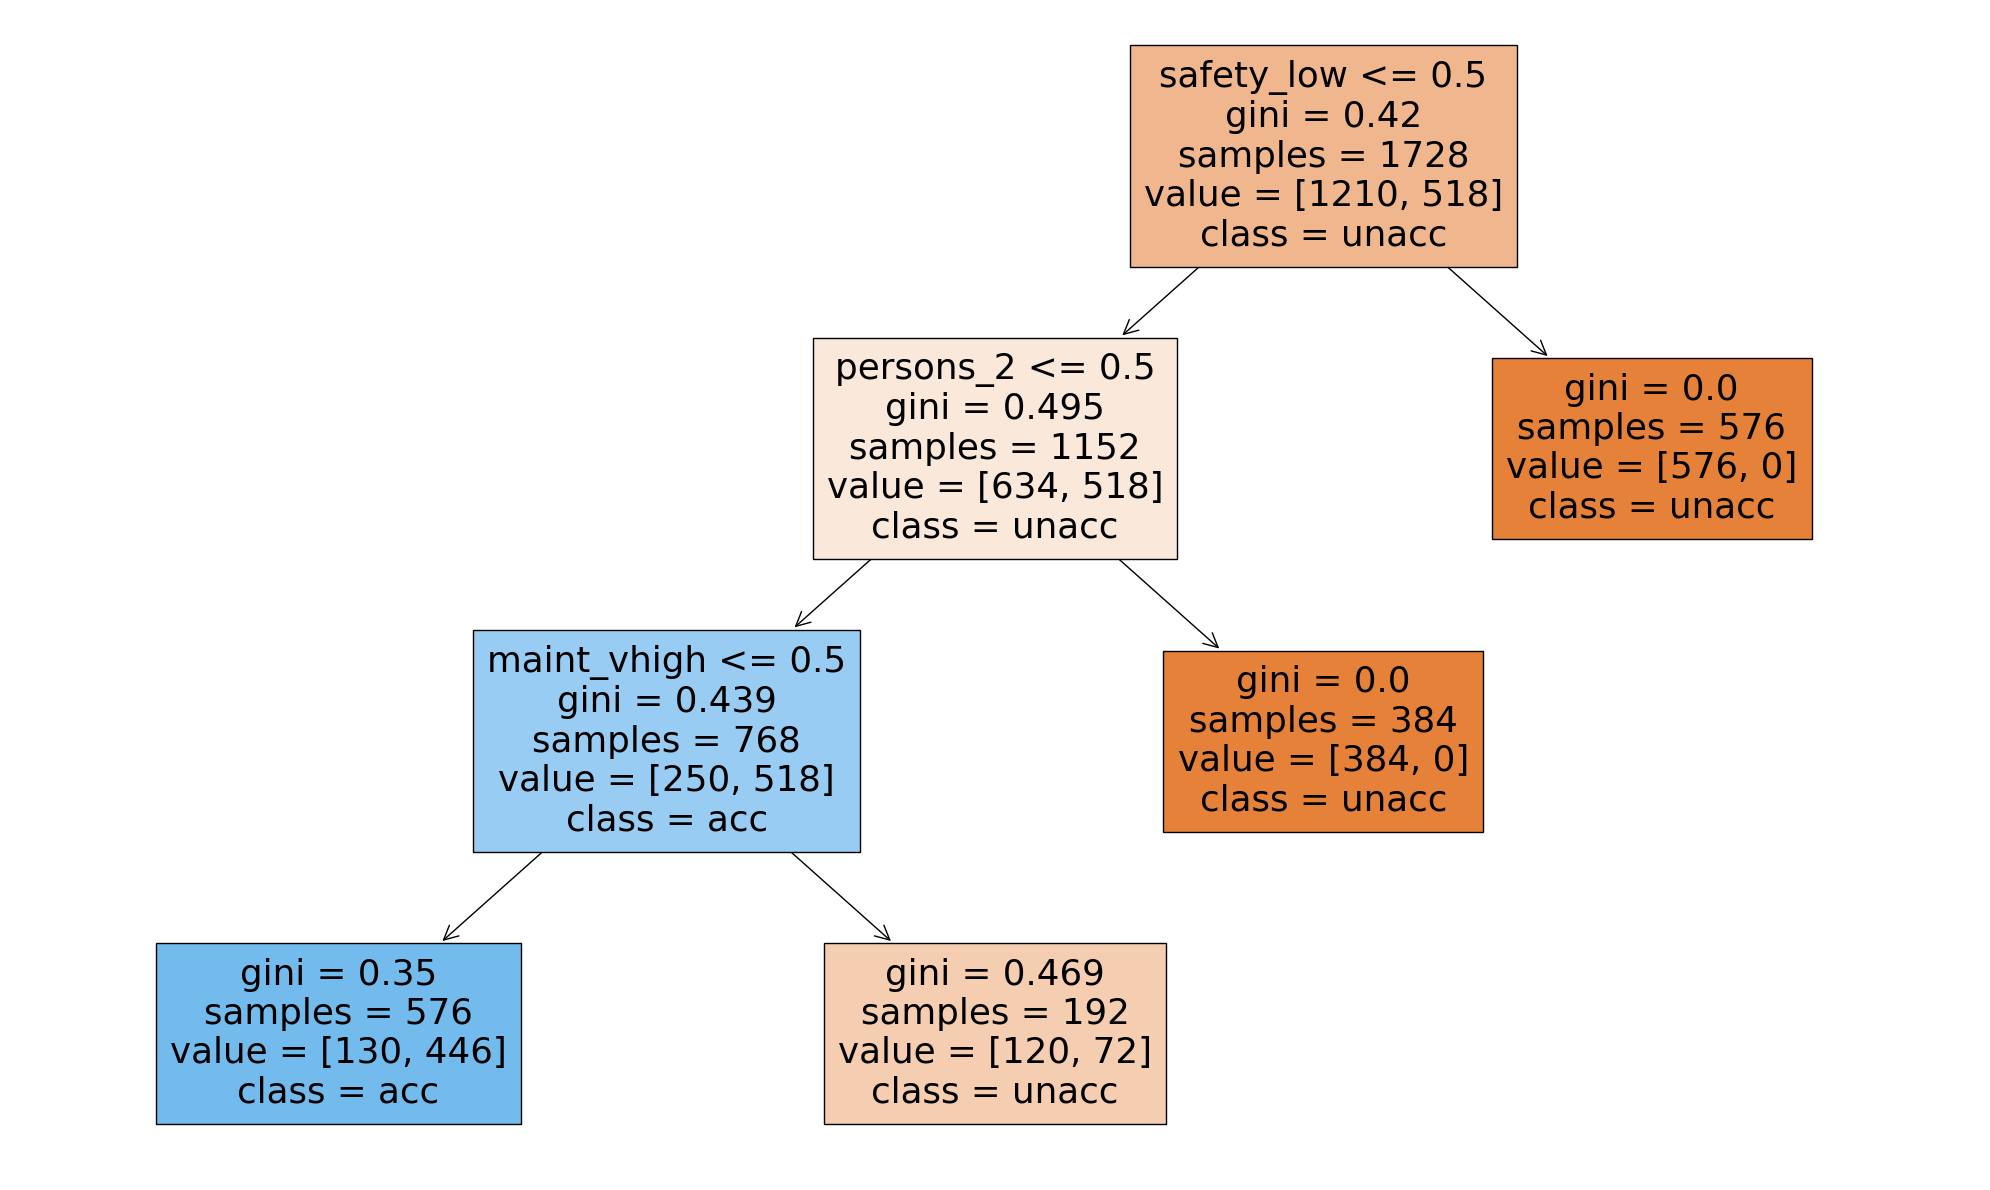

In [4]:
import pandas as pd
import numpy as np
#import codecademylib3
import matplotlib.pyplot as plt


#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Loading the dataset
df = pd.read_csv('sampledata/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])

## 1a. Take a look at the dataset
print(df.head())

## 1b. Setting the target and predictor variables
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

## 1c. Examine the new features
print(X.columns)
print(len(X.columns))

## 2a. Performing the train-test split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

## 2b.Fitting the decision tree classifier
dt = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01,criterion='gini')
#dt.fit(x_train, y_train)
dt.fit(X, y)

## 3.Plotting the Tree
plt.figure(figsize=(20,12))
tree.plot_tree(dt, feature_names = x_train.columns, max_depth=5, class_names = ['unacc', 'acc'], label='all', filled=True)
plt.tight_layout()
plt.show()

Explanation (using entire data, not the split data)

# First split

The first tree checks to see if safety is low.  

There are a total of 1728 cars checked in the entire test data.  

576 meet this criteria (are low safety cars) while 1152 do not (are not low safety cars).  These are reflected in the sample sections of the 2nd row of boxes, the leaf (rightmost box) and the branch.

The values show that there are 1210 acceptable cars and 518 unacceptable cars

# Second split

The second criteria is persons equals 2 and there are 1152 samples of which were vetted out from the previous condition.

Within these sampled 1152 cars, there are 634 unacceptable and 518 acceptable cars, and 384 cars that do not have 2 passengers and 768 that do have 2 passengers.

# Third split

Third criteria is if the car has high maintenance.  From the previous leaf, there are 768 to be checked.  192 have high maintenance while 576 do not have high maintenance.

From these 768, 250 are unacceptable and 518 are acceptable

